PROJECT


In [ ]:
import pandas as pd

df = pd.read_csv('/content/startup_funding.csv')
display(df.head())

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
df['Date dd/mm/yyyy'] = pd.to_datetime(df['Date dd/mm/yyyy'], errors='coerce')
df['Amount in USD'] = df['Amount in USD'].astype(str).str.replace(',', '', regex=False)
df['Amount in USD'] = pd.to_numeric(df['Amount in USD'], errors='coerce')

funding_trend = df.resample('M', on='Date dd/mm/yyyy')['Amount in USD'].sum()

display(funding_trend)

/tmp/ipython-input-510103276.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  funding_trend = df.resample('M', on='Date dd/mm/yyyy')['Amount in USD'].sum()


,Amount in USD
Date dd/mm/yyyy,
2015-01-31,639350000.0
2015-02-28,225720600.0
2015-03-31,307433000.0
2015-04-30,235745000.0
2015-05-31,131750000.0
...,...
2020-06-30,0.0
2020-07-31,0.0
2020-08-31,0.0


In [ ]:
top_sectors = df['Industry Vertical'].value_counts().head(5)
display(top_sectors)

,count
Industry Vertical,
Consumer Internet,941
Technology,478
eCommerce,186
Healthcare,70
Finance,62


In [ ]:
top_cities = df['City  Location'].value_counts().head(5)
display(top_cities)

,count
City Location,
Bangalore,700
Mumbai,567
New Delhi,421
Gurgaon,287
Bengaluru,141


In [ ]:
top_startups = df['Startup Name'].value_counts().head(5)
display(top_startups)

,count
Startup Name,
Swiggy,8
Ola Cabs,8
Paytm,7
Medinfi,6
NoBroker,6


In [ ]:
investment_type_distribution = df['InvestmentnType'].value_counts()
print("Investment Type Distribution:")
display(investment_type_distribution)

Investment Type Distribution:


,count
InvestmentnType,
Private Equity,1356
Seed Funding,1355
Seed/ Angel Funding,60
Seed / Angel Funding,47
Seed\\nFunding,30
Debt Funding,25
Series A,24
Seed/Angel Funding,23
Series B,20


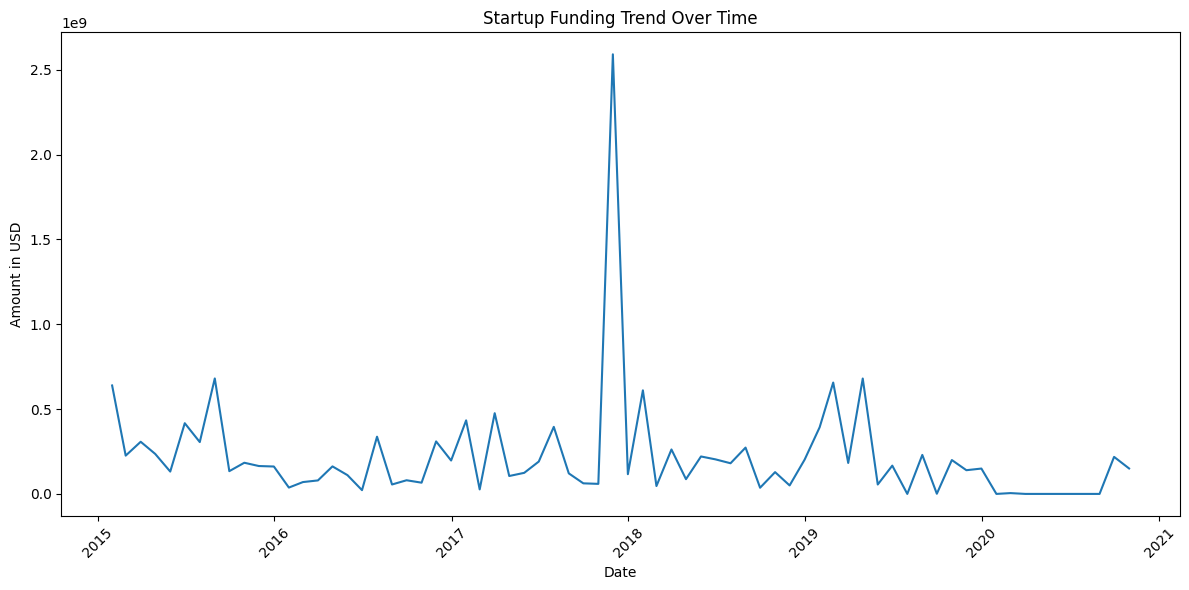

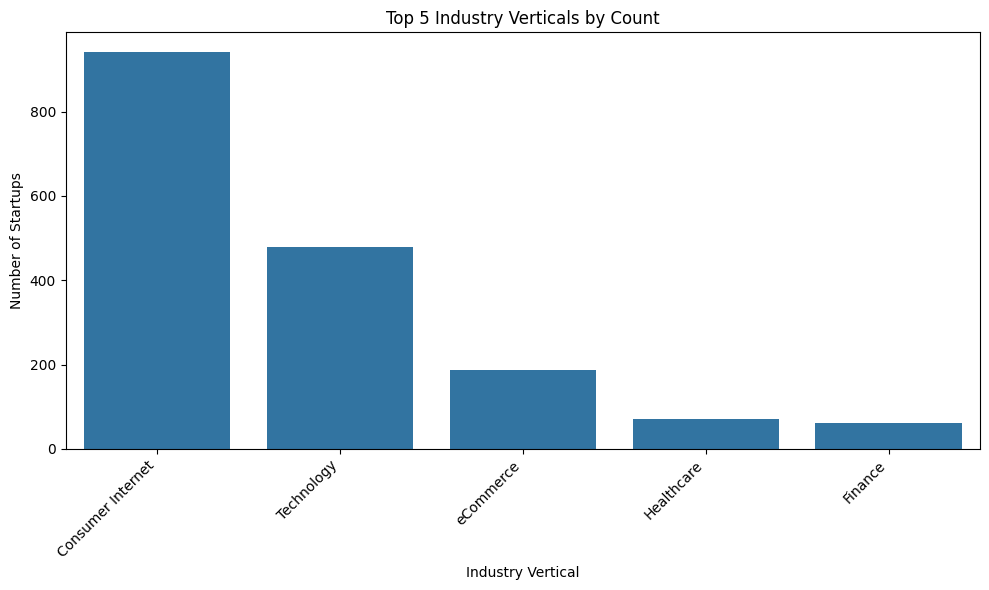

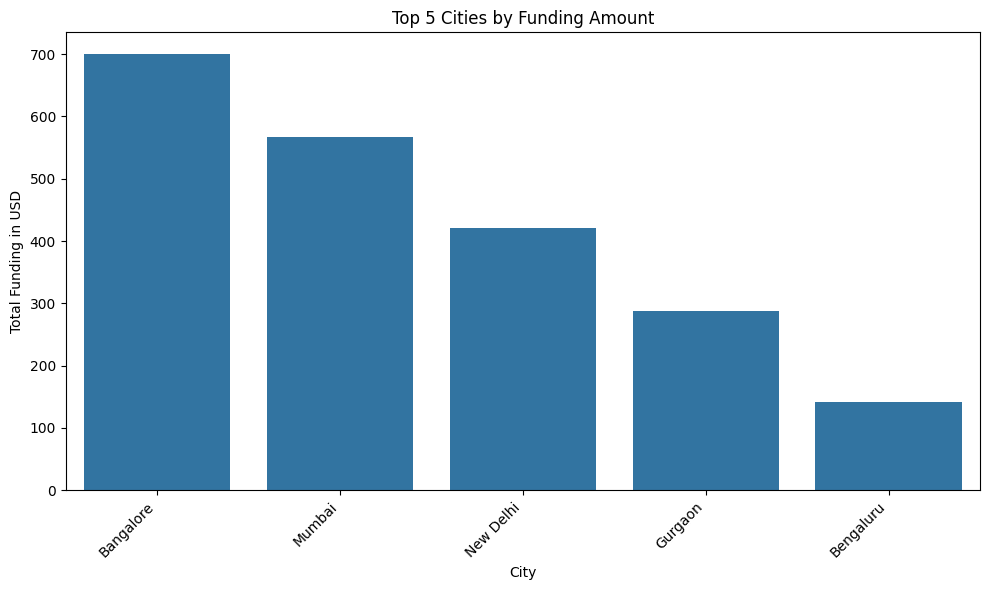

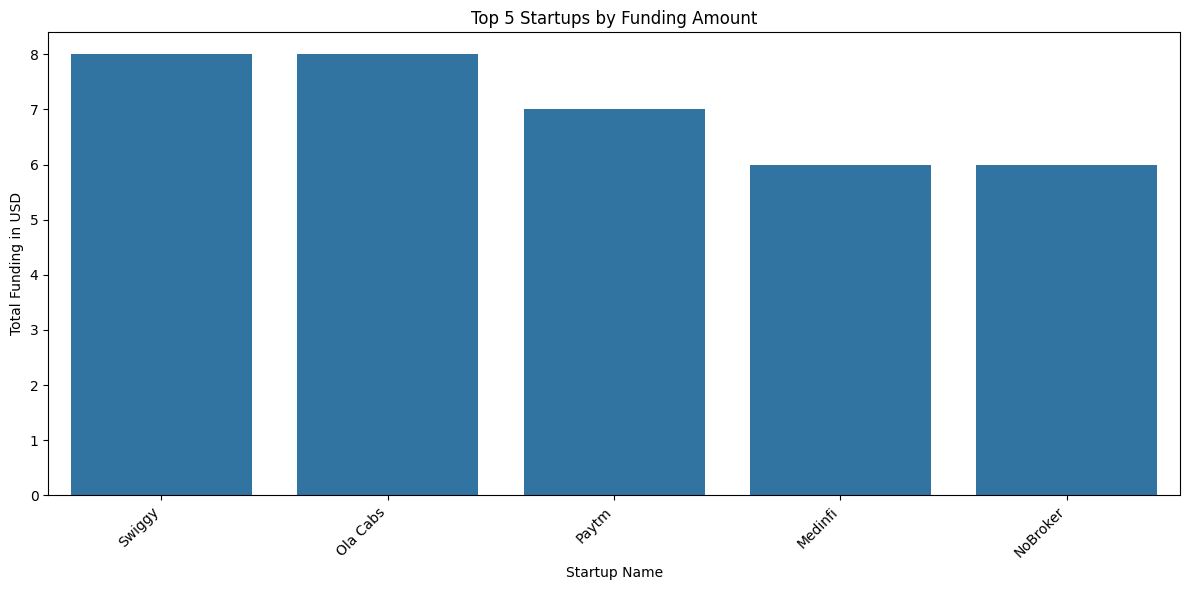

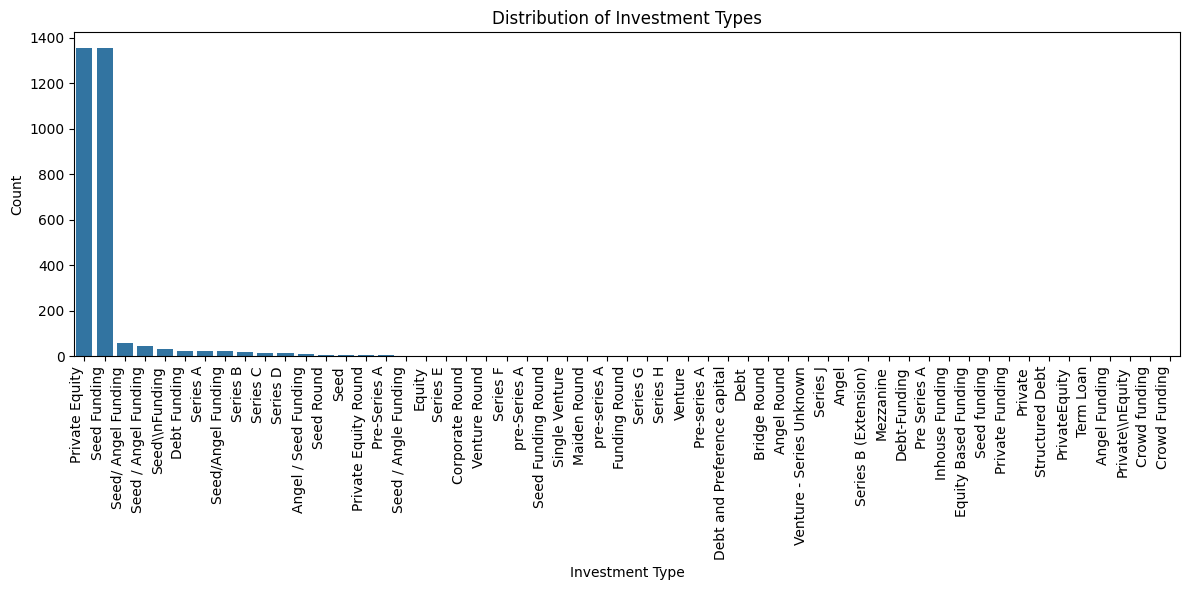

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize funding trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=funding_trend)
plt.title('Startup Funding Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Amount in USD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize top sectors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors.index, y=top_sectors.values)
plt.title('Top 5 Industry Verticals by Count')
plt.xlabel('Industry Vertical')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 5 Cities by Funding Amount')
plt.xlabel('City')
plt.ylabel('Total Funding in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top startups
plt.figure(figsize=(12, 6))
sns.barplot(x=top_startups.index, y=top_startups.values)
plt.title('Top 5 Startups by Funding Amount')
plt.xlabel('Startup Name')
plt.ylabel('Total Funding in USD')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize investment type distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=investment_type_distribution.index, y=investment_type_distribution.values)
plt.title('Distribution of Investment Types')
plt.xlabel('Investment Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()